In [50]:
import numpy as np
import matplotlib.pyplot as plt

## Задача 2.1

[1 балл] Сгенерируйте набор признаков  X  — двумерный массив размера  (1000×1) , состоящий из случайных вещественных чисел, равномерно распределённых по промежутку  [−1,2) . Затем получите набор меток  y  — одномерный массив размера  1000 , — по формуле:
y=3x−8x2+6x3.
Подсказка: может помочь numpy.random.uniform

Полностью векторизуйте решение, то есть избегайте явного использования циклов.

In [57]:
# Задаём размер выборки
n_samples = 1000

# Генерируем набор признаков X: 1000 случайных чисел из [-1, 2)
X = np.random.uniform(low=-1, high=2, size=(n_samples, 1))

# Вычисляем метки y по формуле: y = 3x - 8x^2 + 6x^3
y = 3 * X - 8 * X**2 + 6 * X**3

# Преобразуем y в одномерный массив (1000,)
y = y.ravel()

In [52]:
print(X[:10])

[[ 1.81949637]
 [ 0.88312416]
 [ 0.00471684]
 [-0.58218378]
 [ 1.38207557]
 [ 0.86021827]
 [ 0.60038328]
 [ 1.68167775]
 [ 1.36579163]
 [-0.54497536]]


In [53]:
print(y[:10])

[ 1.51153411e+01  5.42641300e-01  1.39731726e-02 -5.64200008e+00
  4.70485157e+00  4.80093550e-01  2.15954419e-01  1.09558250e+01
  4.46065861e+00 -4.98205126e+00]


Разделите  X,y  случайным образом на два фрагмента в соотношении  100÷900 . Удалите из первого фрагмента пары, в которых  x  лежит за пределами отрезка  [0,1] . Первый фрагмент мы далее будем называть тренировочным, второй — валидационным.

Подсказка: может помочь numpy.random.choice


In [58]:
def train_val_split(
      X:np.ndarray,
      y:np.ndarray,
      train_fraction:float=0.1,
      train_size:int=None,
      random_state:int=42,
    )->tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:

    """
    X : numpy.ndarray (n_samples, n_features) - массив признаков
    y : numpy.ndarray (n_samples) - массив меток

    train_fraction : optional, float - доля объектов, которую
    нужно отправить в тренировочную выборку
    аргумент игнорируется, если задан train_size

    train_size : optional, int - число объектов, которое
    нужно отправить в тренировочную выборку

    random_state : optional, int - аргумент,
    передаваемый генераторам случайных чисел
    (используется для воспроизводимости результатов)
    """

    if not isinstance(X, np.ndarray) or not isinstance(y, np.ndarray):
        raise TypeError("X и y должны быть numpy.ndarray")

    if X.size == 0 or y.size == 0:
        raise ValueError("X и y не должны быть пустыми массивами")



    np.random.seed(random_state)
    n_samples = X.shape[0]

    if train_size is None:
        train_size = int(n_samples * train_fraction)

    # Отбирает признаки случайно часть в train, остальное в валидацию
    train_indices = np.random.choice(n_samples, size=train_size, replace=False)
    val_indices = np.setdiff1d(np.arange(n_samples), train_indices)

    # Получаем тренировочный фрагмент
    X_train = X[train_indices]
    y_train = y[train_indices]

    # Делим данные по маске в промежутке от 0 до 1
    mask = (X_train >= 0) & (X_train <= 1)
    mask = mask.ravel()
    # Фильтрация данных по маске
    X_train = X_train[mask]
    y_train = y_train[mask].reshape(-1, 1)

    # Добавляем гауссов шум к тренировочным меткам
    y_train = y_train + np.random.normal(loc=0, scale=0.1, size=y_train.shape)

    # Получаем валидационный фрагмент
    X_val = X[val_indices]
    y_val = y[val_indices].reshape(-1, 1)

    return X_train, y_train, X_val, y_val

In [59]:
X_train, y_train, X_val, y_val = train_val_split(X, y, train_fraction=0.1, train_size=100, random_state=42)

print("Тренировочный фрагмент (X_train):", X_train.shape)
print("Тренировочный фрагмент (y_train):", y_train.shape)
print("Валидационный фрагмент (X_val):", X_val.shape)
print("Валидационный фрагмент (y_val):", y_val.shape)

Тренировочный фрагмент (X_train): (37, 1)
Тренировочный фрагмент (y_train): (37, 1)
Валидационный фрагмент (X_val): (900, 1)
Валидационный фрагмент (y_val): (900, 1)


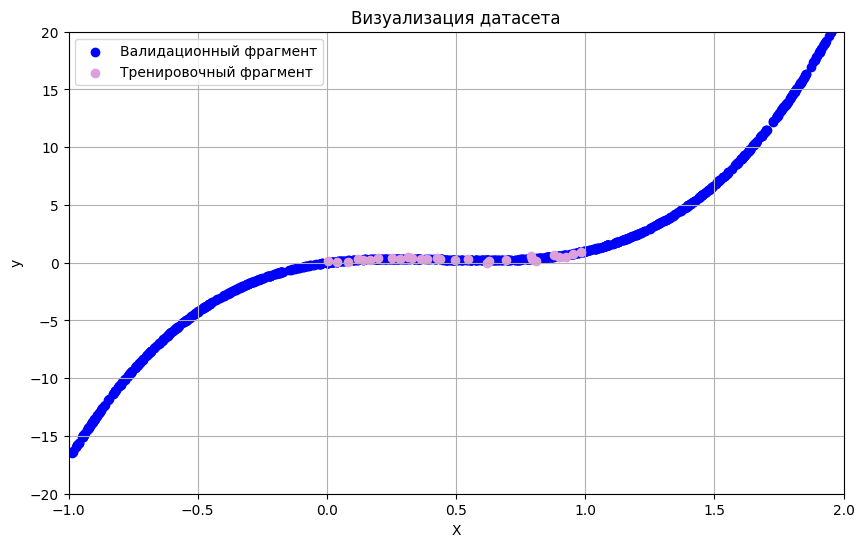

In [56]:
def plot_dataset(X_train, y_train, X_val, y_val):
    plt.figure(figsize=(10, 6))

    plt.scatter(X_val, y_val, color='blue', label='Валидационный фрагмент')

    # Тренировочные данные
    plt.scatter(X_train, y_train, color='plum', label='Тренировочный фрагмент')

    # Валидационные данные
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Визуализация датасета')
    plt.xlim(-1, 2)
    plt.ylim(-20, 20)
    plt.grid(True)
    plt.legend()
    plt.show()

plot_dataset(X_train, y_train, X_val, y_val)

## 2.4